In [ ]:
# Install nltk
!pip install --user -U nltk

     |████████████████████████████████| 1.4MB 2.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=f1de2e008f352eb6897a9f705c76daeb205e47152e57670acf57cc77820bc170
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load dataset
#data = pd.read_csv('/content/UpdatedResumeDataSet.csv', engine='python')
data = pd.read_csv('/content/drive/My Drive/CodeDay/UpdatedResumeDataSet.csv') # Comment this line and uncomment the above line if this does not work for you
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# Print unique categories of resumes
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Operations Manager           40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


In [ ]:
# Drop rows where category is "Testing" and store new size of dataset
data = data[data.Category != 'Testing']
data_size = len(data)

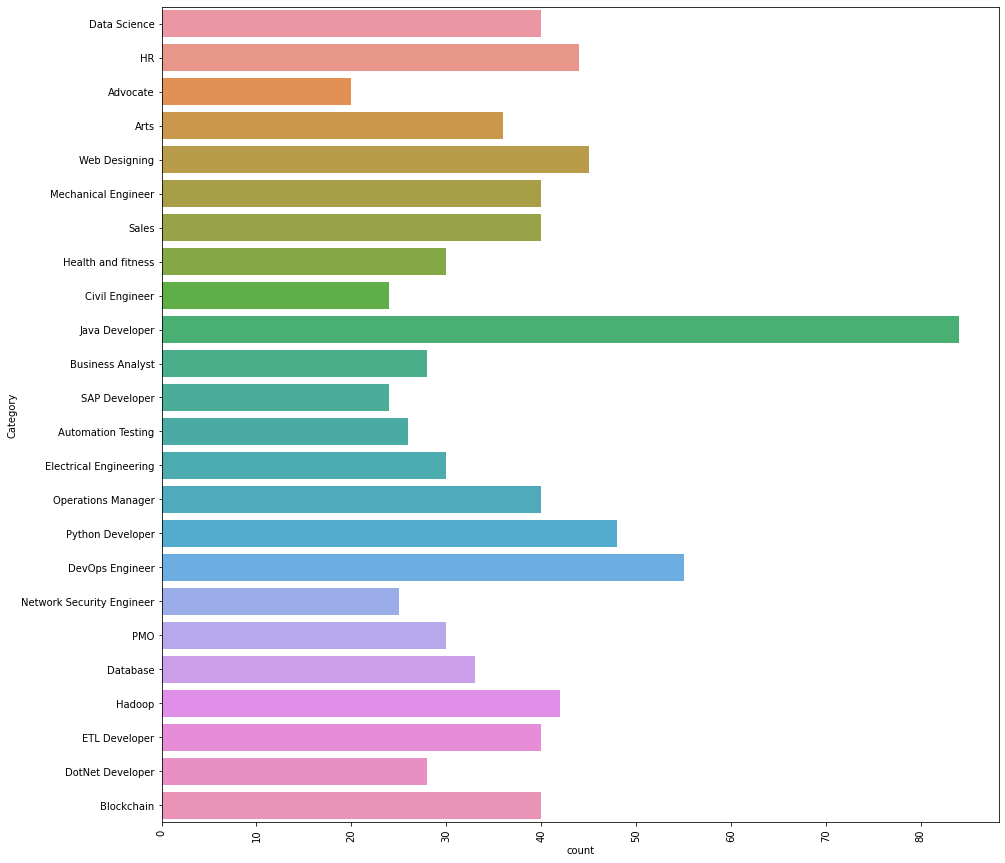

In [ ]:
# Bar graph visualization
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

In [ ]:
# Get set of stopwords
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [ ]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@
    [\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]
    # remove stopwords
    return ' '.join(filtered_text)


In [ ]:
# Print a sample original resume
print('--- Original resume ---')
print(data['Resume'][0])

--- Original resume ---
Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and 

In [ ]:
# Clean the resume
data['cleaned_resume'] = data.Resume.apply(lambda x: clean_text(x))

print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3 js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists elerating r

In [ ]:
# Get features and labels from data and shuffle
features = data['cleaned_resume'].values
original_labels = data['Category'].values
labels = original_labels[:]

for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

import random
random.seed(20)
features, labels = shuffle(features, labels, random_state=20)

# Print example feature and label
print(features[0])
print(labels[0])

education details august 2010 may 2017 electronics communication jabalpur madhya pradesh takshshila institute technology java developer skill details java javascript exprience 6 monthscompany details company wab softwere pvt ltd description jr java developer
javadeveloper


In [ ]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

713
179


In [ ]:
# Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

{'<OOV>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, '1': 9, 'management': 10, 'team': 11, 'year': 12, '6': 13, 'system': 14, 'maharashtra': 15, 'database': 16, 'development': 17, 'business': 18, 'less': 19, 'sql': 20, 'ltd': 21, 'using': 22, 'developer': 23, 'client': 24, 'java': 25, 'skill': 26, 'testing': 27, 'application': 28, 'pune': 29, 'engineering': 30, 'january': 31, 'services': 32, 'work': 33, 'skills': 34, 'c': 35, 'test': 36, 'software': 37, 'sales': 38, 'responsibilities': 39, 'pvt': 40, 'operations': 41, 'requirements': 42, 'reports': 43, 'education': 44, 'server': 45, 'technical': 46, 'process': 47, 'india': 48, 'customer': 49, 'various': 50, 'design': 51, 'technologies': 52, 'university': 53, 'working': 54, 'python': 55, 'monthscompany': 56, '2': 57, 'environment': 58, 'web': 59, 'like': 60, 'college': 61, 'automation': 62, 'support': 63, 'mysql': 64, 'worked': 65, 'role': 66, 'technology': 67, 'activities': 68

In [ ]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'etldeveloper': 7, 'blockchain': 8, 'operationsmanager': 9, 'datascience': 10, 'mechanicalengineer': 11, 'sales': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'healthandfitness': 16, 'pmo': 17, 'dotnetdeveloper': 18, 'businessanalyst': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}
[1]
[1]


In [ ]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  44    7  628  294  250  132  452  171 4892 1243  646 4893  237   67
   25   23   26    7   25  128    2   13   56    7    3 4894 4895   40
   21    6 1205   25   23    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=300),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 64)           384000    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 25)                1625      
Total params: 459,929
Trainable params: 459,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:

# Alternative model
embedding_dim = 64
num_categories = 25

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=300),
  tf.keras.layers.GlobalMaxPooling1D(),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(num_categories, activation='softmax'),])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 64)           384000    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                3225      
Total params: 395,545
Trainable params: 395,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
#print(train_feature_padded[0])
#print(train_label_sequences[0])
#print(test_feature_padded[0])
#print(test_label_sequences[0])

In [ ]:
# Train the neural network
num_epochs = 25

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, shuffle = True, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/25
23/23 - 0s - loss: 3.1942 - accuracy: 0.0954 - val_loss: 3.1750 - val_accuracy: 0.0726
Epoch 2/25
23/23 - 0s - loss: 3.1426 - accuracy: 0.0996 - val_loss: 3.1295 - val_accuracy: 0.0726
Epoch 3/25
23/23 - 0s - loss: 3.0828 - accuracy: 0.0996 - val_loss: 3.0684 - val_accuracy: 0.0726
Epoch 4/25
23/23 - 0s - loss: 3.0059 - accuracy: 0.0996 - val_loss: 2.9893 - val_accuracy: 0.0726
Epoch 5/25
23/23 - 0s - loss: 2.8967 - accuracy: 0.0996 - val_loss: 2.8515 - val_accuracy: 0.0838
Epoch 6/25
23/23 - 0s - loss: 2.7249 - accuracy: 0.1599 - val_loss: 2.6305 - val_accuracy: 0.1955
Epoch 7/25
23/23 - 0s - loss: 2.4666 - accuracy: 0.3520 - val_loss: 2.3458 - val_accuracy: 0.4246
Epoch 8/25
23/23 - 0s - loss: 2.1192 - accuracy: 0.5933 - val_loss: 1.9425 - val_accuracy: 0.7318
Epoch 9/25
23/23 - 0s - loss: 1.6974 - accuracy: 0.8079 - val_loss: 1.5101 - val_accuracy: 0.8212
Epoch 10/25
23/23 - 0s - loss: 1.2613 - accuracy: 0.8878 - val_loss: 1.0924 - val_accuracy: 0.8492
Epoch 11/25
23/23 -

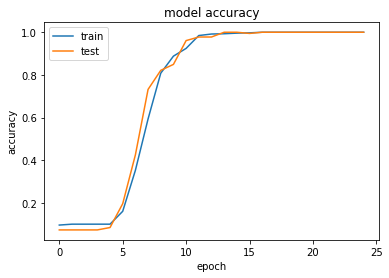

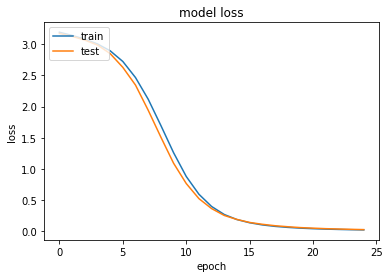

In [ ]:
# Plot the training and validation loss 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

communication skills writing skills english good certainly clear speaker comfortable speaking front audience easily facilitate meetings brainstorming sessions interpersonal skills friendly polite person positive attitude work well others deal difficult situations careful considerate manner learning skills high capacity learning pick new skills ideas quickly generally thrive challenges enthusiasm creativity give edge difficult projects problem solving skills analytical skills help troubleshoot problems uncover root causes creative tenacious education details july 2012 april 2015 bachelor science information technology mumbai maharashtra akbar peerbhoy college comm eco university mumbai june 2008 april 2010 jaunpur uttar pradesh janta inter college jaunpur may 2006 april 2008 jaunpur uttar pradesh inter college jaunpur network security engineer skill details network security network administration firewall vpn configuration routing switching exprience 24 monthscompany details company kar

In [ ]:
# Create padded sequence for example
resume_example = test_features[5]
example_sequence = feature_tokenizer.texts_to_sequences([resume_example])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[ 171   34  253   34  490  152 5939  967 4135 3924 1758  700 1892 1409
  3456  172 2220  642  981   34 1259 5940 1676  977 1532   33  189 1790
  1693 2585 2699 5941 5942 1118  159   34  165  637  159 3481   81   34
  1486 1435 3480 5943 1330 5944 5945 1195 3455 2585   75  469  535   34
   738   34  443  602  525 5946 1477 1916 3479 5947   44    7  586  209
  1067  187  247  101   82   67   78   15 5948 5949   61 5950 4147   53
    78  204  182 1067  294 2197 1496  652 5951 1263   61 2197  251  721
  1067  182 2197 1496  652 1263   61 2197   91  125   85   26    7   91
   125   91  201  551 1156  161  836 1112    2  166   56    7    3 5952
  5953   21    6   88   91  751  751  337   32  206  153  983   48  155
   296  620  161  308  944 5954  110  125  120  475  112   91  600 1240
   707  551 5955 3167  600  602   99  729   77  125  600  825 4038 1147
  1366  142   96  175  407  120   91   91  125  181 5956 1156 1306  370
   137  768 1116  350 1685 5957 1366  125  627 4038 5958  235 17

In [ ]:
# Make a prediction
prediction = model.predict(example_padded)

In [ ]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  # should be 25
print(np.sum(prediction[0]))  # should be 1

[0.0406 0.0404 0.0399 0.04   0.0397 0.0401 0.0396 0.0403 0.0393 0.0404
 0.0406 0.0406 0.0405 0.0397 0.039  0.04   0.0404 0.0389 0.0393 0.0403
 0.0409 0.039  0.0398 0.0404 0.0404]
25
0.99999994


In [ ]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) # should be 3 which corresponds to python developer

0.040866915
20


In [ ]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[20, 0, 11, 10, 12]


In [ ]:
# Save model
model.save('model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [ ]:
# Save feature tokenizer
with open('feature_tokenizer.pickle', 'wb') as handle:
    pickle.dump(feature_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)

with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'blockchain': 7, 'mechanicalengineer': 8, 'operationsmanager': 9, 'etldeveloper': 10, 'sales': 11, 'datascience': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'pmo': 16, 'healthandfitness': 17, 'dotnetdeveloper': 18, 'businessanalyst': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}
{1: 'javadeveloper', 2: 'devopsengineer', 3: 'pythondeveloper', 4: 'webdesigning', 5: 'hr', 6: 'hadoop', 7: 'blockchain', 8: 'mechanicalengineer', 9: 'operationsmanager', 10: 'etldeveloper', 11: 'sales', 12: 'datascience', 13: 'arts', 14: 'database', 15: 'electricalengineering', 16: 'pmo', 17: 'healthandfitness', 18: 'dotnetdeveloper', 19: 'businessanalyst', 20: 'automationtesting', 21: 'networksecurityengineer', 22: 'civilengineer', 23: 'sapdeveloper', 24: 'advocate'}


In [ ]:
print(encoding_to_label[np.argmax(prediction[0])])

automationtesting
